In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression,Ridge

In [2]:
# input
random.seed(98103)
n=30
x=np.random.random(n)
x.shape
#x

(30,)

In [3]:
# output
y= [np.sin(x[i]) for i in range(n)]
y=np.array(y)
y.shape
#y

(30,)

In [4]:
# random gaussian noise y=y+e
e=np.random.randn(n)
e.shape

(30,)

In [5]:
y=y+e

In [6]:
# make dataframe
data=pd.DataFrame( {'x1':x,'y':y} )
data.head()

,x1,y
0,0.566721,-0.601958
1,0.195260,0.430154
2,0.753715,0.444953
3,0.626249,1.861539
4,0.157816,-0.713423


In [7]:
# plot data
def plot_data(data):
    plt.plot(data['x1'],data['y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

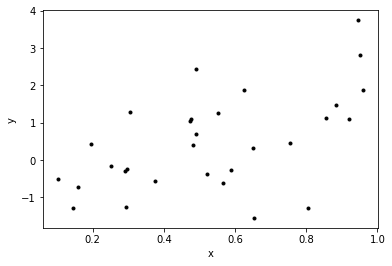

In [8]:
plot_data(data)

In [9]:
# create polynomial features
def poly_feat(data,deg):
    df=data[['x1']]
    for i in range(1,deg):
        df['x'+str(i+1)]=df['x'+str(i)]*df['x1']
    return df

In [10]:
# fit regression
def poly_reg(data,deg):
    df=poly_feat(data,deg)
    reg=LinearRegression()
    reg.fit(df,data[['y']])
    return reg

In [11]:
# plot predictions
def plot_pred(data,model):
    w=model.coef_
    w=w.reshape(-1,)
    deg=len(w)
    x_pred=pd.DataFrame( {'x1':[ i/200.0 for i in range(200)] } )
    x_pred=poly_feat(x_pred,deg)
    y_pred=model.predict(x_pred)
    
    plot_data(data)
    plt.plot(x_pred['x1'],y_pred,'g-',label='degree '+str(deg))
    plt.legend(loc='upper left')
    plt.show()

In [12]:
# print coeff in pretty way
def print_coef(model):
    w=model.intercept_
    w=w.reshape(-1,)
    w=np.append(w,model.coef_)
    reversed(w)
    print(np.poly1d(w))

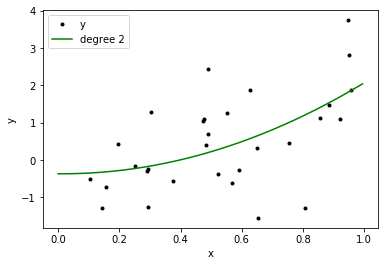

array([[-0.06875255,  2.49825991]])

In [13]:
# fit 2 degree polynomial
model = poly_reg(data,2)
plot_pred(data,model)
model.coef_

In [14]:
print_coef(model)

         2
-0.3657 x - 0.06875 x + 2.498


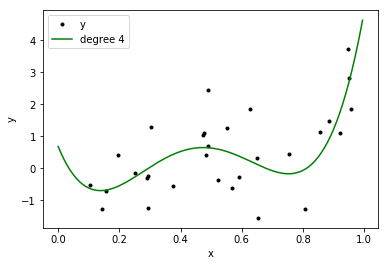

In [15]:
# fit 4 degree polynomial
model = poly_reg(data,4)
plot_pred(data,model)

In [16]:
print_coef(model)

       4         3         2
0.685 x - 23.47 x + 125.3 x - 216.5 x + 118.9


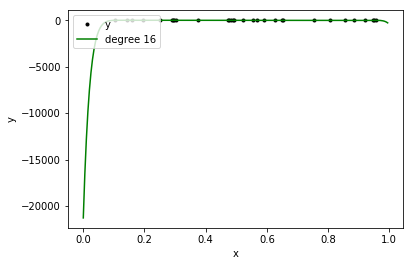

In [17]:
# fit 16 degree polynomial
model = poly_reg(data,16)
plot_pred(data,model)

In [18]:
print_coef(model)    ### coefficients raised to power 16

            16            15             14             13
-2.129e+04 x  + 1.05e+06 x  - 2.319e+07 x  + 3.047e+08 x 
              12            11             10             9
 - 2.671e+09 x  + 1.66e+10 x  - 7.582e+10 x  + 2.601e+11 x
             8             7             6             5             4
 - 6.79e+11 x + 1.356e+12 x - 2.068e+12 x + 2.388e+12 x - 2.051e+12 x
              3             2
 + 1.269e+12 x - 5.338e+11 x + 1.367e+11 x - 1.607e+10


# Ridge regression => lambda(tuning parameter) => l2_penalty

In [19]:
def poly_ridge_reg(data,deg,l2_pen):
    df=poly_feat(data,deg)
    reg=Ridge(alpha=l2_pen)
    model=reg.fit(df,data['y'])
    return model

In [20]:
# small penalty => equivalent to before
model=poly_ridge_reg(data,deg=16,l2_pen=1e-25)
print_coef(model)

       16             15             14             13             12
-8145 x  + 4.175e+05 x  - 9.542e+06 x  + 1.293e+08 x  - 1.165e+09 x 
             11             10             9             8
 + 7.42e+09 x  - 3.464e+10 x  + 1.212e+11 x - 3.223e+11 x
              7             6             5             4             3
 + 6.543e+11 x - 1.014e+12 x + 1.188e+12 x - 1.035e+12 x + 6.487e+11 x
              2
 - 2.765e+11 x + 7.168e+10 x - 8.528e+09


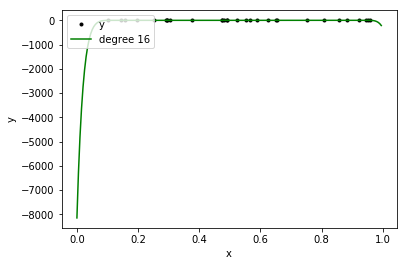

In [21]:
plot_pred(data,model)

In [22]:
# large penalty => underfit
model=poly_ridge_reg(data,deg=16,l2_pen=100)
print_coef(model)

        16           15           14           13           12
0.3654 x  + 0.04434 x  + 0.05078 x  + 0.05074 x  + 0.04943 x 
           11           10           9           8           7
 + 0.0478 x  + 0.04602 x  + 0.04415 x + 0.04225 x + 0.04033 x
            6           5           4           3           2
 + 0.03842 x + 0.03655 x + 0.03474 x + 0.03299 x + 0.03131 x + 0.02969 x + 0.02816


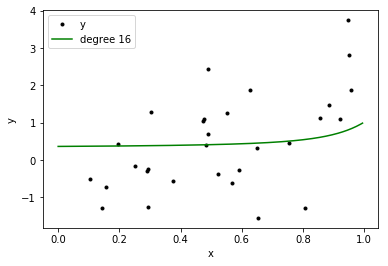

In [23]:
plot_pred(data,model)

       16             15             14             13             12
-8145 x  + 4.175e+05 x  - 9.542e+06 x  + 1.293e+08 x  - 1.165e+09 x 
             11             10             9             8
 + 7.42e+09 x  - 3.464e+10 x  + 1.212e+11 x - 3.223e+11 x
              7             6             5             4             3
 + 6.543e+11 x - 1.014e+12 x + 1.188e+12 x - 1.035e+12 x + 6.487e+11 x
              2
 - 2.765e+11 x + 7.168e+10 x - 8.528e+09


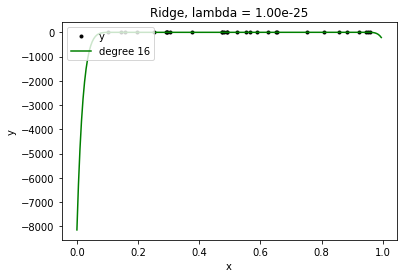

       16         15        14        13             12             11
7.446 x  - 210.4 x  + 2010 x  - 8991 x  + 1.938e+04 x  - 1.489e+04 x 
         10             9             8        7        6        5
 - 8385 x  + 1.008e+04 x + 1.015e+04 x - 1328 x - 8553 x - 6243 x
          4        3        2
 + 773.2 x + 5393 x + 4278 x - 487.8 x - 2980


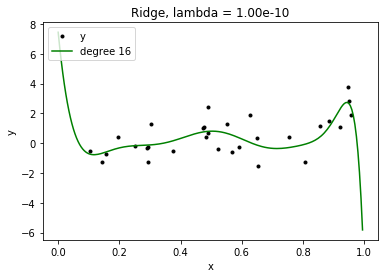

         16         15         14         13         12        11
-0.4781 x  - 3.319 x  + 11.82 x  + 33.09 x  - 49.65 x  - 52.9 x 
           10         9         8        7         6        5         4
 + 0.6978 x  + 40.25 x + 42.05 x + 20.3 x - 2.783 x - 13.6 x - 10.32 x
           3         2
 + 0.4766 x + 8.351 x + 2.599 x - 25.7


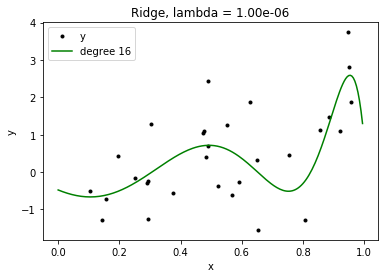

        16         15        14         13         12         11
-1.476 x  + 4.969 x  + 3.89 x  - 5.908 x  - 8.834 x  - 5.854 x 
           10        9         8        7         6         5         4
 - 0.8804 x  + 3.53 x + 6.342 x + 7.42 x + 7.022 x + 5.517 x + 3.257 x
           3         2
 + 0.5343 x - 2.427 x - 5.463 x - 8.459


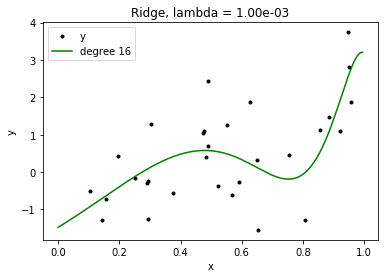

        16           15           14           13           12
0.3654 x  + 0.04434 x  + 0.05078 x  + 0.05074 x  + 0.04943 x 
           11           10           9           8           7
 + 0.0478 x  + 0.04602 x  + 0.04415 x + 0.04225 x + 0.04033 x
            6           5           4           3           2
 + 0.03842 x + 0.03655 x + 0.03474 x + 0.03299 x + 0.03131 x + 0.02969 x + 0.02816


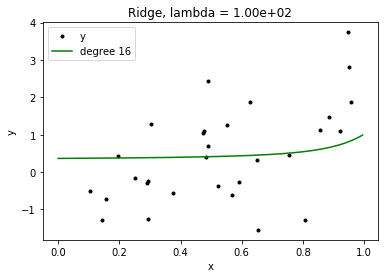

In [24]:
# sequence of penalties
l2=[1e-25,1e-10,1e-6,1e-3,1e2]
for l in l2:
    model=poly_ridge_reg(data,16,l)
    print_coef(model)
    plt.title('Ridge, lambda = %.2e'%l)
    plot_pred(data,model)

# use a good penalty => cross validation

In [25]:
from sklearn.model_selection import LeaveOneOut, KFold

In [210]:
## LOO => Leave one out cross validation
def LOO(data,deg,l2_pen):
    df=poly_feat(data,deg)
    df['y']=data['y']
    
    num_folds=len(df)
    model=KFold(n_splits=num_folds)
    folds=model.split(df)
    
    l2_pen_mse=[]
    min_mse=None
    best_l2=None
    
    for l2 in l2_pen:
        num_folds=len(df)
        model=KFold(n_splits=num_folds)
        folds=model.split(df)

        err=0.0
        for train,valid in folds:
            train_x=df.iloc[train,:-1]
            train_y=df.iloc[train,-1]  
            test_x=df.iloc[valid,:-1]
            test_y=np.array(df.iloc[valid,-1])
            
            model=Ridge(alpha=l2)
            model.fit(train_x,train_y)
            y_pred=model.predict(test_x)
            err+= ((test_y-y_pred)**2)
        
        err=err/num_folds
        err=float(err)
        l2_pen_mse.append(err)
        
        if(min_mse is None or err<min_mse):
            min_mse=err
            best_l2=l2
        
    return l2_pen_mse,best_l2

In [214]:
l2_pen = np.logspace(-4,10,num=10)
print(l2_pen)
l2_pen_mse,best_l2 = LOO(data,16,l2_pen)

[1.00000000e-04 3.59381366e-03 1.29154967e-01 4.64158883e+00
 1.66810054e+02 5.99484250e+03 2.15443469e+05 7.74263683e+06
 2.78255940e+08 1.00000000e+10]


In [212]:
print(l2_pen_mse)

[1.1852270477552866, 1.1456673583926025, 1.142567346999172, 1.1709378566133883, 1.6046086695509179, 1.7162209657885366, 1.7198858522361848, 1.7199883317399984, 1.7199911836833457, 1.7199912630406653]


In [213]:
print(best_l2)

0.1291549665014884


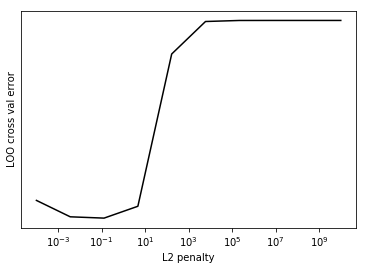

In [219]:
plt.plot(l2_pen,l2_pen_mse,'k-')
plt.xlabel('L2 penalty')
plt.ylabel('LOO cross val error')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [221]:
## model with best l2
model=poly_ridge_reg(data,16,best_l2)
print_coef(model)

        16       15           14          13          12          11
-0.538 x  + 1.9 x  + 0.07583 x  - 0.7825 x  - 0.8642 x  - 0.6091 x 
           10           9          8          7          6        5
 - 0.2662 x  + 0.05383 x + 0.3128 x + 0.5047 x + 0.6369 x + 0.72 x
          4          3          2
 + 0.765 x + 0.7812 x + 0.7762 x + 0.7561 x + 0.7255


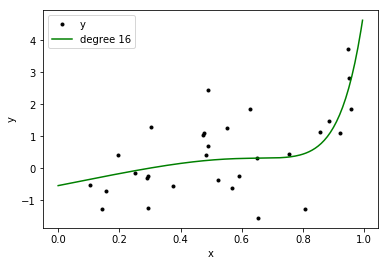

In [222]:
plot_pred(data,model)